In [ ]:
'''
Introduction to Feature Selection Methods
Learn about the pros and cons of different feature selection methods.

Introduction and motivation
Imagine you want to build a machine learning model for predicting the presence of a disease, 
and you have a dataset of patient records containing hundreds of different metrics, from 
demographic characteristics to medical test results to past treatment history. 
While having access to so many data points is always a good starting point, 
you most likely would not want to use all of the available features to construct your model, 
as many of them can be redundant or irrelevant, and would only serve to contribute unnecessary noise. 
Instead, a more effective approach is to select only a subset of relevant, predictive features to use in your model
— this process is known as feature selection.

Feature selection is an important step in the machine learning pipeline, 
and when done right, can optimize the performance and predictive power of your model.
The goal is to improve the model’s accuracy and efficiency by eliminating extraneous variables that 
do not contribute any useful information. In addition, simplifying the model through feature selection 
not only makes the results more easily interpretable, but also reduces the time and resources required
to run the model.

There are three broad categories of feature selection that we will discuss in this article: 
filter methods, wrapper methods, and embedded methods.

Feature Selection Methods


Filter methods:
Filter methods are the simplest type of feature selection method. 
They work by filtering features prior to model building based on some criteria.

Advantages
They are computationally inexpensive, since they do not involve testing the subsetted features using a model.
They can work for any type of machine learning model.
Disadvantages
It is more difficult to take multivariate relationships into account because we are not evaluating model performance. For example, a variable might not have much predictive power on its own, but can be informative when combined with other variables.
They are not tailored toward specific types of models.
Examples
Variance thresholds
Correlation
Mutual information


Wrapper methods:
Wrapper methods involve fitting a model and evaluating its performance for a particular subset of features. They work by using a search algorithm to find which combination of features can optimize the performance of a given model.

Advantages
They can determine the optimal set of features that produce the best results for a specific machine learning problem.
They can better account for multivariate relationships because model performance is evaluated.
Disadvantages
They are computationally expensive because the model needs to be re-fitted for each feature set being tested.
Examples
Forward/backward/bidirectional sequential feature selection
Recursive feature elimination


Embedded methods:
Embedded methods also involve building and evaluating models for different feature subsets, 
but their feature selection process happens at the same time as their model fitting step.

Advantages
Like wrapper methods, they can optimize the feature set for a particular model and account for multivariate relationships.
They are also generally less computationally expensive because feature selection happens during model training.
Examples
Regularization (e.g., lasso/ridge regression)
Tree-based feature importance
Conclusion
When it comes to the number of features to keep for your model, more is not always better. It is worth being selective about which features to retain in order to maximize performance and reduce noise. Therefore, finding and implementing the right feature selection method is a key part of developing an effective and reliable model.
'''

In [1]:
import pandas as pd
 
df = pd.DataFrame(data={
    'edu_goal': ['bachelors', 'bachelors', 'bachelors', 'masters', 'masters', 'masters', 'masters', 'phd', 'phd', 'phd'],
    'hours_study': [1, 2, 3, 3, 3, 4, 3, 4, 5, 5],
    'hours_TV': [4, 3, 4, 3, 2, 3, 2, 2, 1, 1],
    'hours_sleep': [10, 10, 8, 8, 6, 6, 8, 8, 10, 10],
    'height_cm': [155, 151, 160, 160, 156, 150, 164, 151, 158, 152],
    'grade_level': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
    'exam_score': [71, 72, 78, 79, 85, 86, 92, 93, 99, 100]
})
 
print(df)

    edu_goal  hours_study  hours_TV  hours_sleep  height_cm  grade_level  \
0  bachelors            1         4           10        155            8   
1  bachelors            2         3           10        151            8   
2  bachelors            3         4            8        160            8   
3    masters            3         3            8        160            8   
4    masters            3         2            6        156            8   
5    masters            4         3            6        150            8   
6    masters            3         2            8        164            8   
7        phd            4         2            8        151            8   
8        phd            5         1           10        158            8   
9        phd            5         1           10        152            8   

   exam_score  
0          71  
1          72  
2          78  
3          79  
4          85  
5          86  
6          92  
7          93  
8          99  
9  

In [2]:
#drop the target from x
# 10 x 6 features matrix
X = df.drop(columns=['exam_score'])
 
print(X)

    edu_goal  hours_study  hours_TV  hours_sleep  height_cm  grade_level
0  bachelors            1         4           10        155            8
1  bachelors            2         3           10        151            8
2  bachelors            3         4            8        160            8
3    masters            3         3            8        160            8
4    masters            3         2            6        156            8
5    masters            4         3            6        150            8
6    masters            3         2            8        164            8
7        phd            4         2            8        151            8
8        phd            5         1           10        158            8
9        phd            5         1           10        152            8


In [3]:
#put the target into y
y = df['exam_score']
 
print(y)

0     71
1     72
2     78
3     79
4     85
5     86
6     92
7     93
8     99
9    100
Name: exam_score, dtype: int64


In [4]:
'''
Variance threshold
One of the most basic filter methods is to use a variance threshold to remove any features that have 
little to no variation in their values. This is because features with low variance do not 
contribute much information to a model. Since variance can only be calculated on numeric values, 
this method only works on quantitative features. That said, we may also want to remove categorical 
features for which all or a majority of the values are the same. To do that, we would need to dummy code 
the categorical variables first, but we won’t demonstrate that here.

In our example dataset, edu_goal is the only feature that is not numeric. 
We can use the .drop() method to remove it from our features DataFrame and store the remaining numeric features 
in X_num:

'''

X_num = X.drop(columns=['edu_goal'])
 
print(X_num)

   hours_study  hours_TV  hours_sleep  height_cm  grade_level
0            1         4           10        155            8
1            2         3           10        151            8
2            3         4            8        160            8
3            3         3            8        160            8
4            3         2            6        156            8
5            4         3            6        150            8
6            3         2            8        164            8
7            4         2            8        151            8
8            5         1           10        158            8
9            5         1           10        152            8


In [5]:
'''
Now, we’ll be able to use the VarianceThreshold class from scikit-learn to help remove the 
low-variance features from X_num. By default, it drops all features with zero variance, 
but we can adjust the threshold during class instantiation using the threshold parameter 
if we want to allow some variation. 
The .fit_transform() method returns the filtered features as a numpy array:
'''
from sklearn.feature_selection import VarianceThreshold
 
selector = VarianceThreshold(threshold=0)  # 0 is default
 
print(selector.fit_transform(X_num))


[[  1   4  10 155]
 [  2   3  10 151]
 [  3   4   8 160]
 [  3   3   8 160]
 [  3   2   6 156]
 [  4   3   6 150]
 [  3   2   8 164]
 [  4   2   8 151]
 [  5   1  10 158]
 [  5   1  10 152]]


In [6]:
'''
As we can see, grade_level was removed because there is no variation in its values — 
all students are 8th graders. Since this data is the same across the board, 
a student’s grade level will not be able to provide any useful predictive information about their exam score, 
so it makes sense to drop grade_level as a feature.

Something to note is that loading datasets with scikit-learn generally works with numpy arrays internally, 
hence the output type of .fit_transform(). However, the methods can also accept other data types that 
can be converted to numpy arrays, such as Python lists or pandas DataFrames, like the X_num we used. 
From a human perspective, one downside of working with numpy arrays as compared to pandas DataFrame is that 
we lose information like column headings, making the data harder to visually inspect.

Luckily, VarianceThreshold offers another method called .get_support() that can return the indices of the 
selected features, which we can use to manually subset our numeric features DataFrame:
'''

# Specify `indices=True` to get indices of selected features
print(selector.get_support(indices=True))

[0 1 2 3]


In [7]:
# Use indices to get the corresponding column names of selected features
num_cols = list(X_num.columns[selector.get_support(indices=True)])
 
print(num_cols)

['hours_study', 'hours_TV', 'hours_sleep', 'height_cm']


In [8]:
# Subset `X_num` to retain only selected features
X_num = X_num[num_cols]
 
print(X_num)

   hours_study  hours_TV  hours_sleep  height_cm
0            1         4           10        155
1            2         3           10        151
2            3         4            8        160
3            3         3            8        160
4            3         2            6        156
5            4         3            6        150
6            3         2            8        164
7            4         2            8        151
8            5         1           10        158
9            5         1           10        152


In [9]:
#Finally, to obtain our entire features DataFrame, including the categorical column edu_goal, we could do:

X = X[['edu_goal'] + num_cols]
 
print(X)

    edu_goal  hours_study  hours_TV  hours_sleep  height_cm
0  bachelors            1         4           10        155
1  bachelors            2         3           10        151
2  bachelors            3         4            8        160
3    masters            3         3            8        160
4    masters            3         2            6        156
5    masters            4         3            6        150
6    masters            3         2            8        164
7        phd            4         2            8        151
8        phd            5         1           10        158
9        phd            5         1           10        152


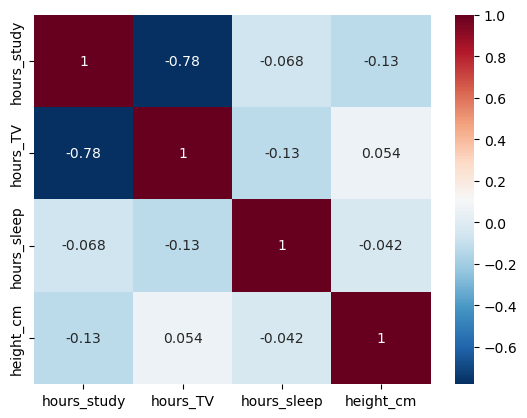

In [11]:
'''
Pearson’s correlation
Another type of filter method involves finding the correlation between variables. 
In particular, the Pearson’s correlation coefficient is useful for measuring the linear relationship 
between two numeric, continuous variables — a coefficient close to 1 represents a positive correlation, 
-1 represents a negative correlation, and 0 represents no correlation. 
Like variance, Pearson’s correlation coefficient cannot be calculated for categorical variables. 
Although, there is a related point biserial correlation coefficient that can be computed when one 
variable is dichotomous, but we won’t focus on that here.

There are 2 main ways of using correlation for feature selection — to detect correlation between features 
and to detect correlation between a feature and the target variable.

Correlation between features
When two features are highly correlated with one another, then keeping just one to be used in the model 
will be enough because otherwise they provide duplicate information. 
The second variable would only be redundant and serve to contribute unnecessary noise.

To determine which variables are correlated with one another, we can use the .corr() method from 
pandas to find the correlation coefficient between each pair of numeric features in a DataFrame. 
By default, .corr() computes the Pearson’s correlation coefficient, 
but alternative methods can be specified using the method parameter. 
We can visualize the resulting correlation matrix using a heatmap:
'''
import matplotlib.pyplot as plt
import seaborn as sns
 
corr_matrix = X_num.corr(method='pearson')  # 'pearson' is default
 
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()

In [12]:
'''
Let’s define high correlation as having a coefficient of greater than 0.7 or less than -0.7. 
We can loop through the correlation matrix to identify the highly correlated variables:
'''
# Loop over bottom diagonal of correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
 
        # Print variables with high correlation
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])


hours_TV hours_study -0.780763315142435


In [ ]:
'''
As seen, hours_TV appears to be highly negatively correlated with hours_study — a student who watches a lot of 
TV tends to spend fewer hours studying, and vice versa. Because they provide redundant information, 
we can choose to remove one of those variables. To decide which one, we can look at their correlation with 
the target variable, then remove the one that is less associated with the target. 
This is explored in the next section.
'''

In [13]:
'''
Correlation between feature and target
As mentioned, the second way correlation can be used is to determine if there is a relationship between a 
feature and the target variable. In the case of Pearson’s correlation, 
this is especially useful if we intend to fit a linear model, which assumes a linear relationship 
between the target and predictor variables. If a feature is not very correlated with the target variable, 
such as having a coefficient of between -0.3 and 0.3, then it may not be very predictive and can potentially 
be filtered out.

We can use the same .corr() method seen previously to obtain the correlation between the target variable 
and the rest of the features. First, we’ll need to create a new DataFrame containing the numeric features 
with the exam_score column:
'''
X_y = X_num.copy()
X_y['exam_score'] = y
 
print(X_y)


   hours_study  hours_TV  hours_sleep  height_cm  exam_score
0            1         4           10        155          71
1            2         3           10        151          72
2            3         4            8        160          78
3            3         3            8        160          79
4            3         2            6        156          85
5            4         3            6        150          86
6            3         2            8        164          92
7            4         2            8        151          93
8            5         1           10        158          99
9            5         1           10        152         100


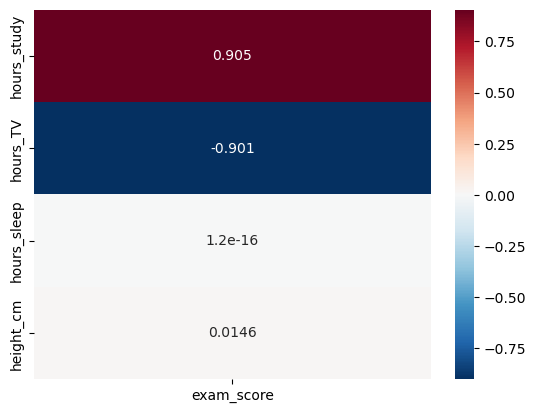

In [14]:
'''
Then, we can generate the correlation matrix and isolate the column corresponding to the target variable 
to see how strongly each feature is correlated with it:
'''
corr_matrix = X_y.corr()
 
# Isolate the column corresponding to `exam_score`
corr_target = corr_matrix[['exam_score']].drop(labels=['exam_score'])
 
sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

In [15]:
'''
As seen, hours_study is positively correlated with exam_score and hours_TV is negatively correlated with it. 
It makes sense that hours_study and hours_TV would be negatively correlated with each other as we saw earlier, 
and just one of those features would suffice for predicting exam_score. 
Since hours_study has a stronger correlation with the target variable, 
let’s remove hours_TV as the redundant feature:


'''

X = X.drop(columns=['hours_TV'])
 
print(X)

    edu_goal  hours_study  hours_sleep  height_cm
0  bachelors            1           10        155
1  bachelors            2           10        151
2  bachelors            3            8        160
3    masters            3            8        160
4    masters            3            6        156
5    masters            4            6        150
6    masters            3            8        164
7        phd            4            8        151
8        phd            5           10        158
9        phd            5           10        152


In [16]:
'''
The other two features, hours_sleep and height_cm, both do not seem to be correlated with exam_score, suggesting they would not be very good predictors. We could potentially remove either or both of them as being uninformative. But before we do, it is a good idea to use other methods to double check that the features truly are not predictive. We will do that in the next section by using mutual information to see if there 
are any non-linear associations between the features and target variable.

To conclude this section, we’ll briefly note an alternative approach for assessing the correlation between variables. 
Instead of generating the full correlation matrix, we could use the f_regression() function 
from scikit-learn to find the F-statistic for a model with each predictor on its own. 
The F-statistic will be larger (and p-value will be smaller) for predictors that are more highly 
correlated with the target variable, thus it will perform the same filtering:
'''
from sklearn.feature_selection import f_regression
 
print(f_regression(X_num, y))

(array([3.61362007e+01, 3.44537037e+01, 0.00000000e+00, 1.70259066e-03]), array([3.19334945e-04, 3.74322763e-04, 1.00000000e+00, 9.68097878e-01]))


In [ ]:
'''
The function returns the F-statistic in the first array and the p-value in the second. 
As seen, the result is consistent with what we had observed in the correlation matrix — the stronger the correlation 
(either positive or negative) between the feature and target, the higher the corresponding F-statistic and 
lower the p-value. For example, amongst all the features, hours_study has the largest correlation coefficient (0.905), highest F-statistic (3.61e+01), 
and lowest p-value (3.19e-04).
'''

In [ ]:
'''
Mutual information
The final filter method we’ll look at is using mutual information to rank and select the top features. 
Mutual information is a measure of dependence between two variables and can be used to gauge how much a 
feature contributes to the prediction of the target variable. It is similar to Pearson’s correlation, 
but is not limited to detecting linear associations. This makes mutual information useful for more 
flexible models where a linear functional form is not assumed. Another advantage of mutual information 
is that it also works on discrete features or target, unlike correlation. 
Although, categorical variables need to be numerically encoded first.
'''



In [17]:
'''
In our example, we can encode the edu_goal column using the LabelEncoder class 
from scikit-learn‘s preprocessing module:
'''
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
 
# Create copy of `X` for encoded version
X_enc = X.copy()
X_enc['edu_goal'] = le.fit_transform(X['edu_goal'])
 
print(X_enc)

   edu_goal  hours_study  hours_sleep  height_cm
0         0            1           10        155
1         0            2           10        151
2         0            3            8        160
3         1            3            8        160
4         1            3            6        156
5         1            4            6        150
6         1            3            8        164
7         2            4            8        151
8         2            5           10        158
9         2            5           10        152


In [18]:
'''
Now, we can compute the mutual information between each feature and exam_score using mutual_info_regression(). 
This function is used because our target variable is continuous, but if we had a discrete target variable, 
we would use mutual_info_classif(). 
We specify the random_state in the function in order obtain reproducible results:
'''
from sklearn.feature_selection import mutual_info_regression
 
print(mutual_info_regression(X_enc, y, random_state=68))


[0.50396825 0.40896825 0.06896825 0.        ]


'''
The estimated mutual information between each feature and the target is returned in a numpy array, where each value is a non-negative number — the higher the value, the more predictive power is assumed.

However, we are missing one more important piece here. Earlier, even though we encoded edu_goal to be numeric,
that does not mean it should be treated as a continuous variable. In other words, the values of edu_goal are 
still discrete and should be interpreted as such. If we plot edu_goal against exam_score on a graph, 
we can clearly see the steps between the values of edu_goal:


'''

In [20]:
'''
In order to properly calculate the mutual information, we need to tell mutual_info_regression() 
which features are discrete by providing their index positions 
using the discrete_features parameter:
'''
print(mutual_info_regression(X_enc, y, discrete_features=[0], random_state=68))


[0.75563492 0.38896825 0.18563492 0.        ]


In [ ]:
'''
Compared to the earlier results, we now get greater mutual information between edu_goal and the target variable once it is correctly interpreted as a discrete feature.

From the results, we can also see that there is 0 mutual information between height_cm and exam_score, suggesting that these variables are largely independent. This is consistent with what we saw earlier with Pearson’s correlation, 
where the correlation coefficient between them is very close to 0 as well.

What is interesting to note is that the mutual information between hours_sleep and exam_score is a positive value,
even though their Pearson’s correlation coefficient is 0. The answer becomes more clear when we plot the 
relationship between hours_sleep and exam_score:

As seen, there do seem to be some association between the variables, only it is not a linear one, which is why it was detected using mutual information
but not Pearson’s correlation coefficient.
'''

In [21]:
'''
Finally, let’s look at using the SelectKBest class from scikit-learn to help pick out the top k 
features with the highest ranked scores. In our case, we are looking to select features that 
share the most mutual information with the target variable. When we instantiate SelectKBest, we’ll specify which scoring function to use and how many top features to select. Here, our scoring function is mutual_info_regression(), but because we want to specify additional arguments besides the X and y inputs, we’ll need the help of the partial() function from Python’s built-in functools module. Then, the .fit_transform() method will return the filtered features 
as a numpy array:
'''

from sklearn.feature_selection import SelectKBest
from functools import partial
 
score_func = partial(mutual_info_regression, discrete_features=[0], random_state=68)
 
# Select top 3 features with the most mutual information
selection = SelectKBest(score_func=score_func, k=3)
 
print(selection.fit_transform(X_enc, y))

[[ 0  1 10]
 [ 0  2 10]
 [ 0  3  8]
 [ 1  3  8]
 [ 1  3  6]
 [ 1  4  6]
 [ 1  3  8]
 [ 2  4  8]
 [ 2  5 10]
 [ 2  5 10]]


In [22]:
'''
As seen above, we selected the top 3 features based on mutual information, thus dropping height_cm. Like VarianceThreshold, SelectKBest also offers the .get_support() method that returns the indices of the selected features, 
so we could subset our original features DataFrame:
'''

X = X[X.columns[selection.get_support(indices=True)]]
 
print(X)


    edu_goal  hours_study  hours_sleep
0  bachelors            1           10
1  bachelors            2           10
2  bachelors            3            8
3    masters            3            8
4    masters            3            6
5    masters            4            6
6    masters            3            8
7        phd            4            8
8        phd            5           10
9        phd            5           10


In [ ]:
'''
Conclusion
In our example dataset, we started out with 6 features for predicting the exam_score of students. 
Using various filter methods, we narrowed down that set to just the top most relevant and informative ones. 
First, we eliminated grade_level because it has zero variance and would contribute nothing to the model. 
Then, we dropped hours_TV since it is highly correlated with hours_study and is therefore redundant. 
Lastly, we filtered out height_cm based on mutual information, which suggested that it does not have any meaningful 
association with the target variable, 
linear or otherwise, and would not have been very predictive.
'''